In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import gutplotsB as gp

%run ./gutplotsB.py


%load_ext autoreload
%autoreload 2
df = pd.read_csv('processed_a.csv', index_col=[0])
df.head(2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,CustomerID,State,Region,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,PrizmCode,Occupation,MaritalStatus,CreditRating_split,AgeGroupHH1,Churn,Churn1
0,3000002,Oregon,Pacific,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,...,0,30,Yes,Suburban,Professional,No,Highest,middle,Yes,1
1,3000982,Oregon,Pacific,53.69,144.0,50.0,0.00,0.0,0.0,72.0,...,0,130,No,Suburban,Other,Unknown,Highest,young,No,0


## DATA

### **Target:**
- Churn (binary)
    
### **Nominal Features:**
- MonthlyRevenue   
- MonthlyMinutes
- TotalRecurringCharge
- DirectorAssistedCalls
- OverageMinutes
- RoamingCalls
- PercChangeMinutes
- PercChangeRevenues
- DroppedCalls
- BlockedCalls
- UnansweredCalls
- CustomerCareCalls
- ThreewayCalls
- ReceivedCalls
- OutboundCalls
- InboundCalls
- PeakCallsInOut
- OffPeakCallsInOut
- DroppedBlockedCalls
- CallForwardingCalls
- CallWaitingCalls
- MonthsInService

- Handsets
- HandsetModels
- CurrentEquipmentDays
- AdjustmentsToCreditRating
- ReferralsMadeBySubscriber
- IncomeGroup


### **Categorical Features:**
- ChildrenInHH
- HandsetRefurbished
- HandsetWebCapable
- TruckOwner
- RVOwner
- Homeownership
- BuysViaMailOrder
- RespondsToMailOffers
- OptOutMailings
- NonUSTravel
- OwnsComputer
- HasCreditCard
- RetentionCalls
- RetentionOffersAccepted
- NewCellphoneUser
- NotNewCellphoneUser
- AgeHH
- OwnsMotorcycle
- HandsetPrice
- MadeCallToRetentionTeam
- PrizmCode
- Occupation
- MaritalStatus
- CreditRating
- UniqueSubs
- ActiveSubs

#### Data Size
Rows: 49752 

Features: 60 

Missing Values: 13808 


In [12]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 49752 

Features: 60 

Missing Values: 13808 

Unique Values: CustomerID                   49752
State                           47
Region                           9
MonthlyRevenue               12504
MonthlyMinutes                2706
TotalRecurringCharge           211
DirectorAssistedCalls          143
OverageMinutes                 739
RoamingCalls                   522
PercChangeMinutes             2236
PercChangeRevenues            2872
DroppedCalls                   283
BlockedCalls                   369
UnansweredCalls                832
CustomerCareCalls              183
ThreewayCalls                   78
ReceivedCalls                 6061
OutboundCalls                  778
InboundCalls                   465
PeakCallsInOut                1824
OffPeakCallsInOut             1657
DroppedBlockedCalls            443
CallForwardingCalls             30
CallWaitingCalls               221
MonthsInService                 56
UniqueSubs                      15
ActiveSubs            

## Target Variable : Churn

In [13]:
df['UniqueSubs']=df['UniqueSubs'].astype('object')
df['ActiveSubs']=df['ActiveSubs'].astype('object')
df['HandsetModels']=df['HandsetModels'].astype('object')
df['Other Revenues'] = df['MonthlyRevenue'] - df['TotalRecurringCharge']

df.to_csv('processed_b.csv')


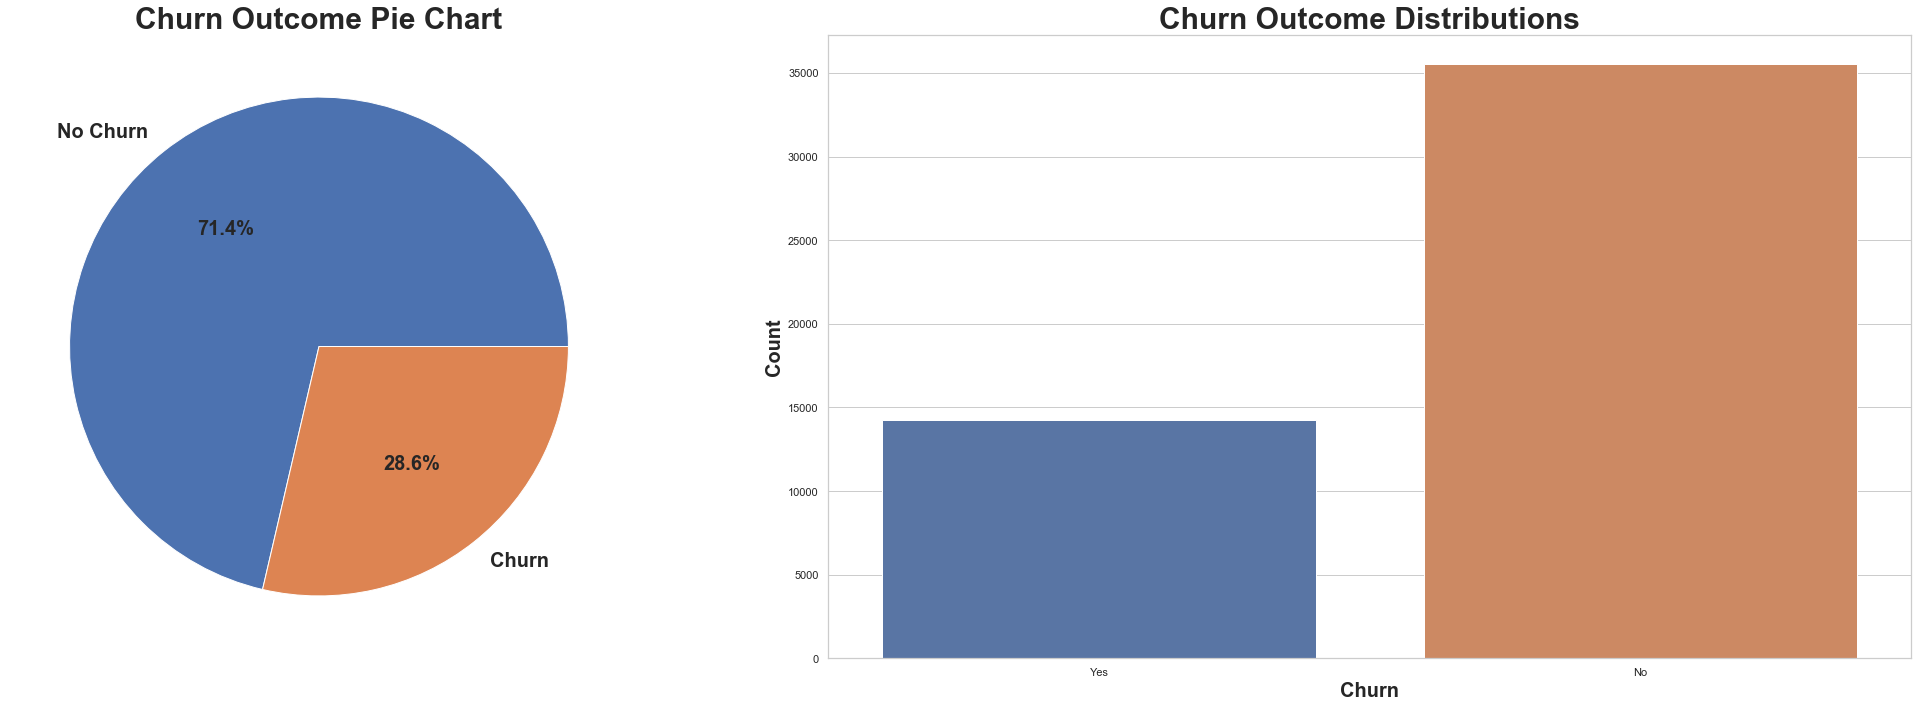

In [14]:
plot_target_dist(df)

### ToyFone has a current churn rate of 28.6% and the objective is for the analytics team to provide insight to give management areas that they can address which would improve churn going forward.


In [15]:
#Bundled Object and Number Variables
num_df = df.copy()
num_df = df.select_dtypes(include = ['number'])
num_df = num_df.drop(['CustomerID'], axis = 1)
num_df.isnull().values.sum()
num_cols =  num_df.columns
obj_df= df.select_dtypes(include = ['object'])
obj_cols = df.select_dtypes(include = ['object']).columns 
num_df.head(2)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,Handsets,CurrentEquipmentDays,AgeHH1,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn1,Other Revenues
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,...,2.0,361.0,62.0,1,0,0,4,0,1,2.00
1,53.69,144.0,50.0,0.00,0.0,0.0,72.0,-0.4,0.7,0.0,...,6.0,325.0,36.0,0,0,0,5,0,0,3.69


### Numerical Variables

In [16]:
#num_Churn has numerical and object churn column for plot purposes
num_Churn = num_df.copy()
num_Churn['Churn'] = obj_df['Churn']
#Churned and NonChurned will be used in numeric plots 
Churned = num_Churn.loc[num_Churn['Churn']== 'Yes']
NonChurned=  num_Churn.loc[num_Churn['Churn']== 'No']

In [17]:
#plotting histograms based on original numerical dataframes.
def plot_hist(NonChurned):
    hist_ax= 1
    fig = plt.figure(figsize = (60, 40))
    for i in range(30):
        plt.subplot(6,6, hist_ax)
        plt.hist(x = num_cols[i], data = NonChurned, label="NonChurned", color = '#39ff14')
        plt.hist(x = num_cols[i], data = Churned, label="Churned",color= '#0f66e9')
        plt.title(num_cols[i] + ' (' + str(hist_ax - 1) + ')', fontsize = 25, fontweight = 'bold')
        plt.ylabel('Count')
        plt.tight_layout()
        hist_ax = hist_ax + 1

#### Histogram of Numerical Features

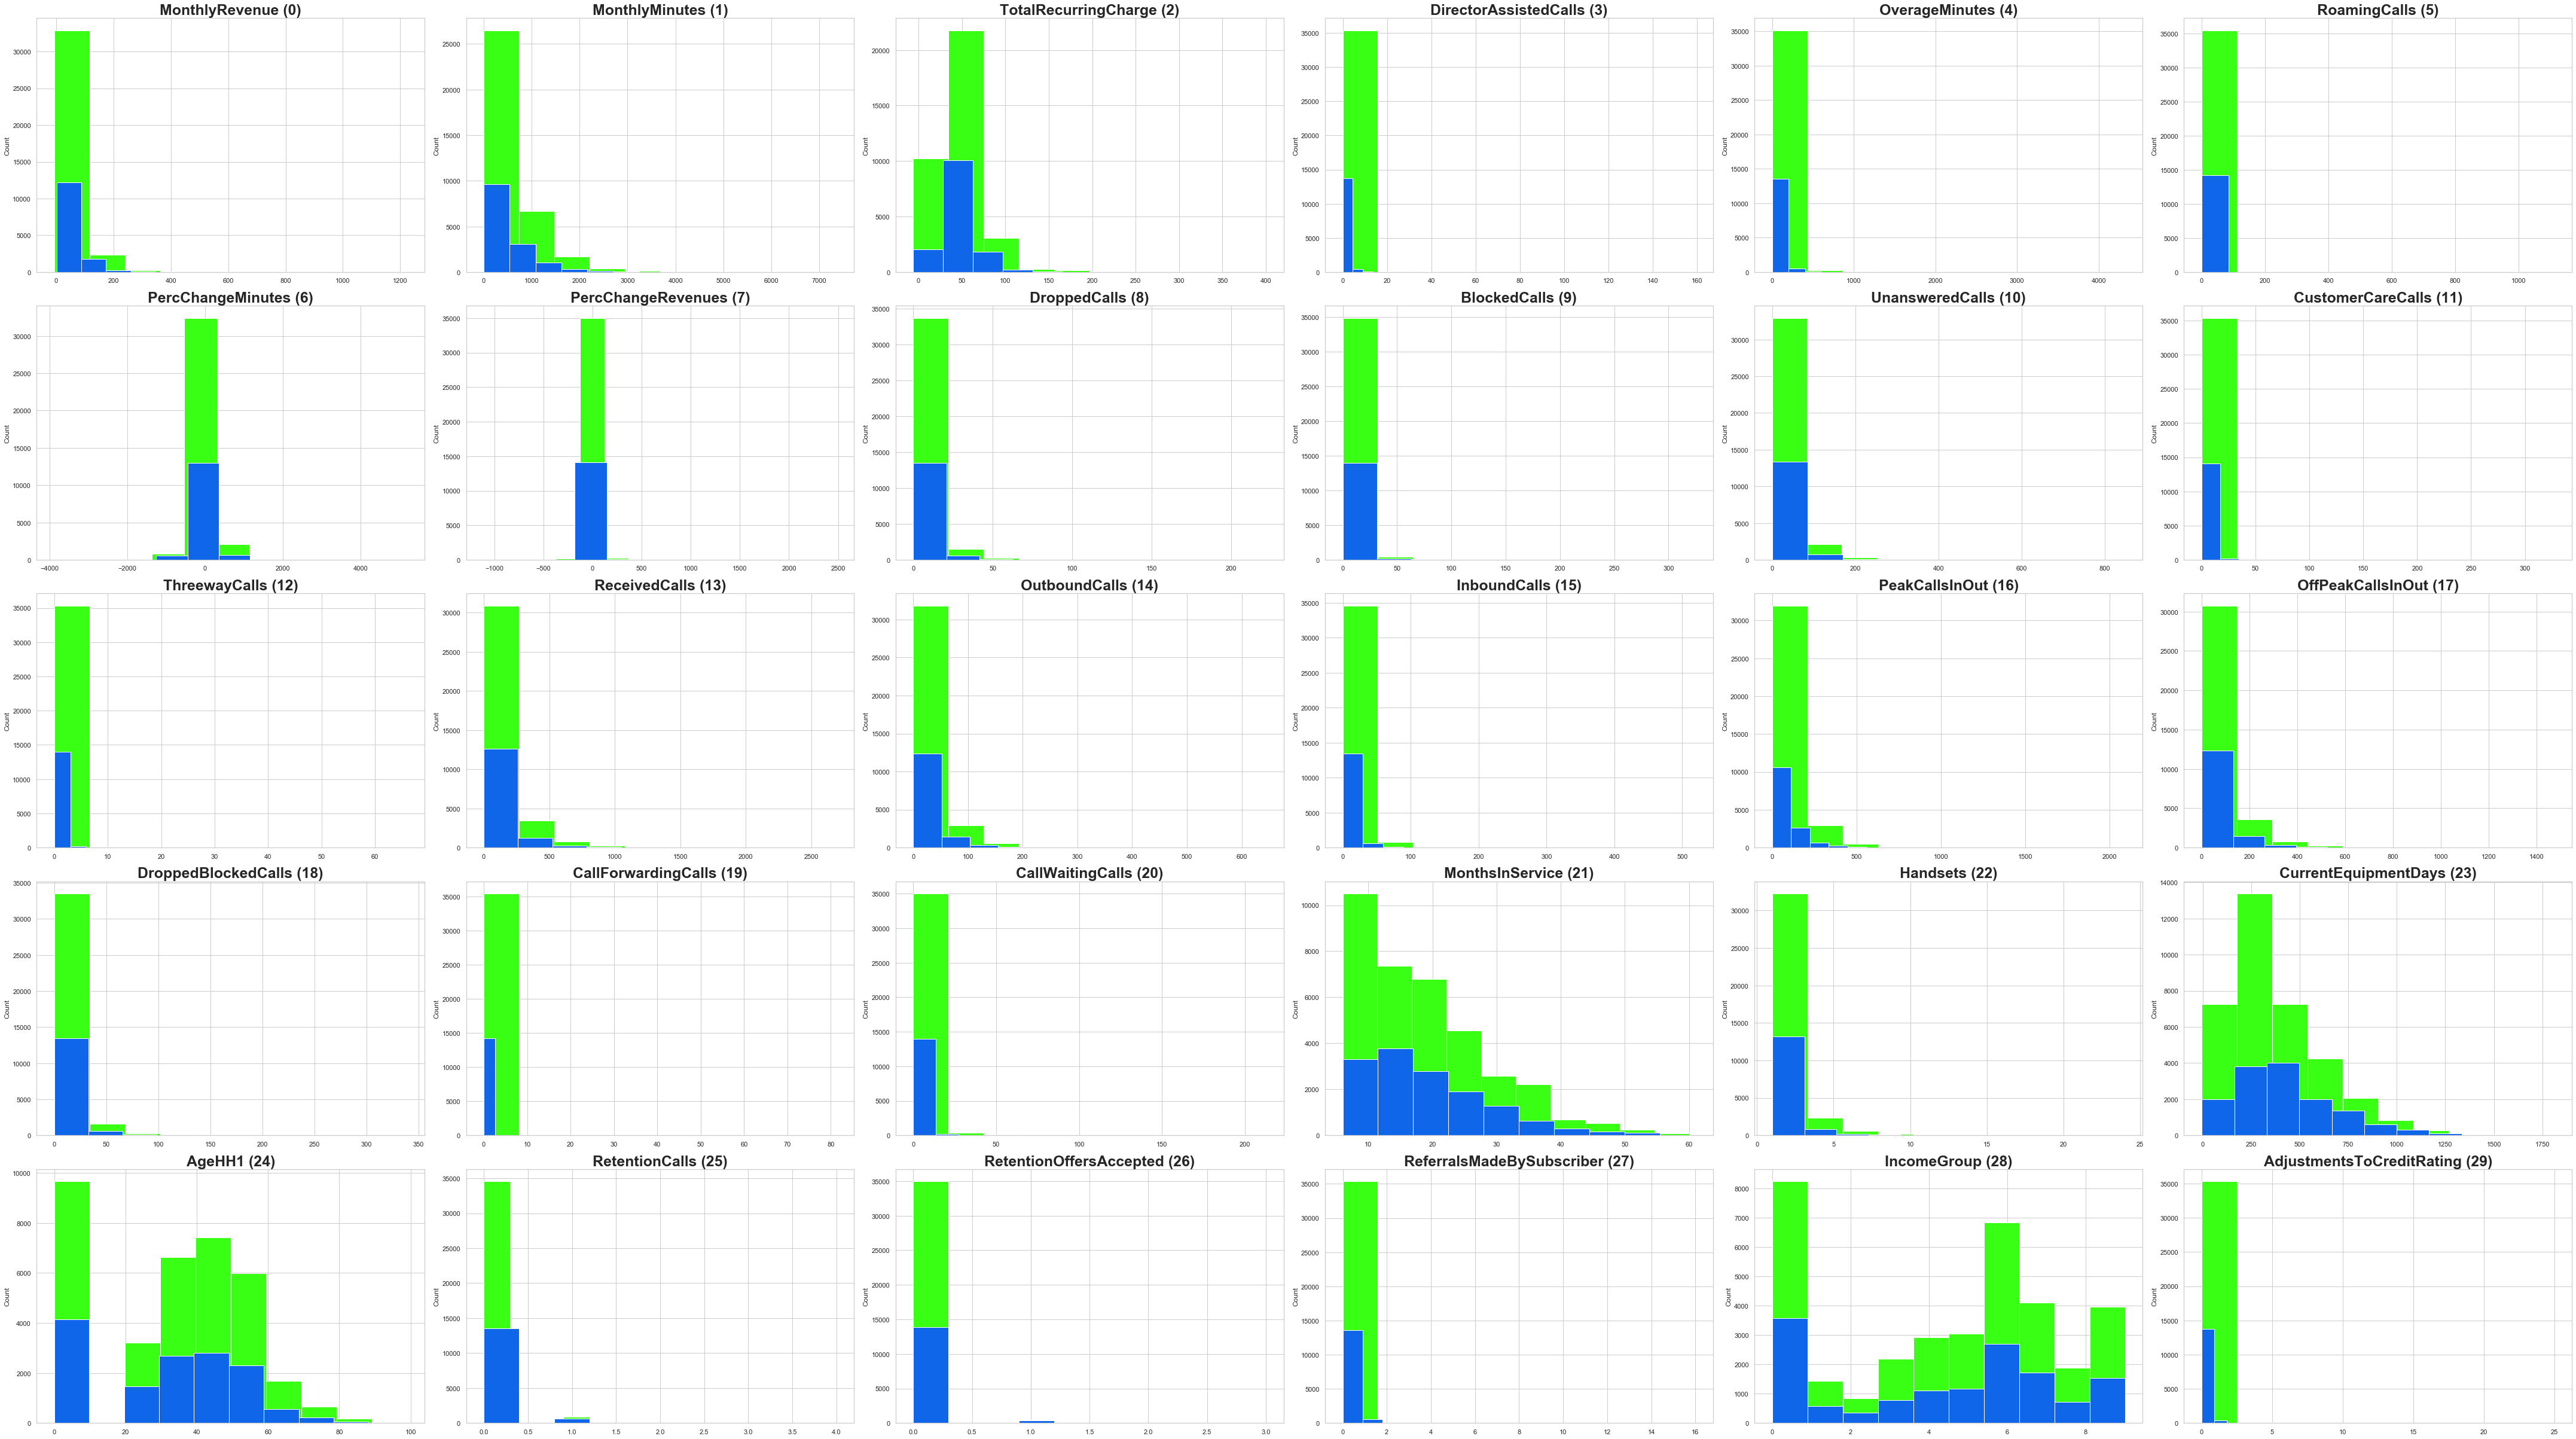

In [18]:
plot_hist(NonChurned)
fig.savefig('fullhist2.png')

### Violin Plots of Numerical

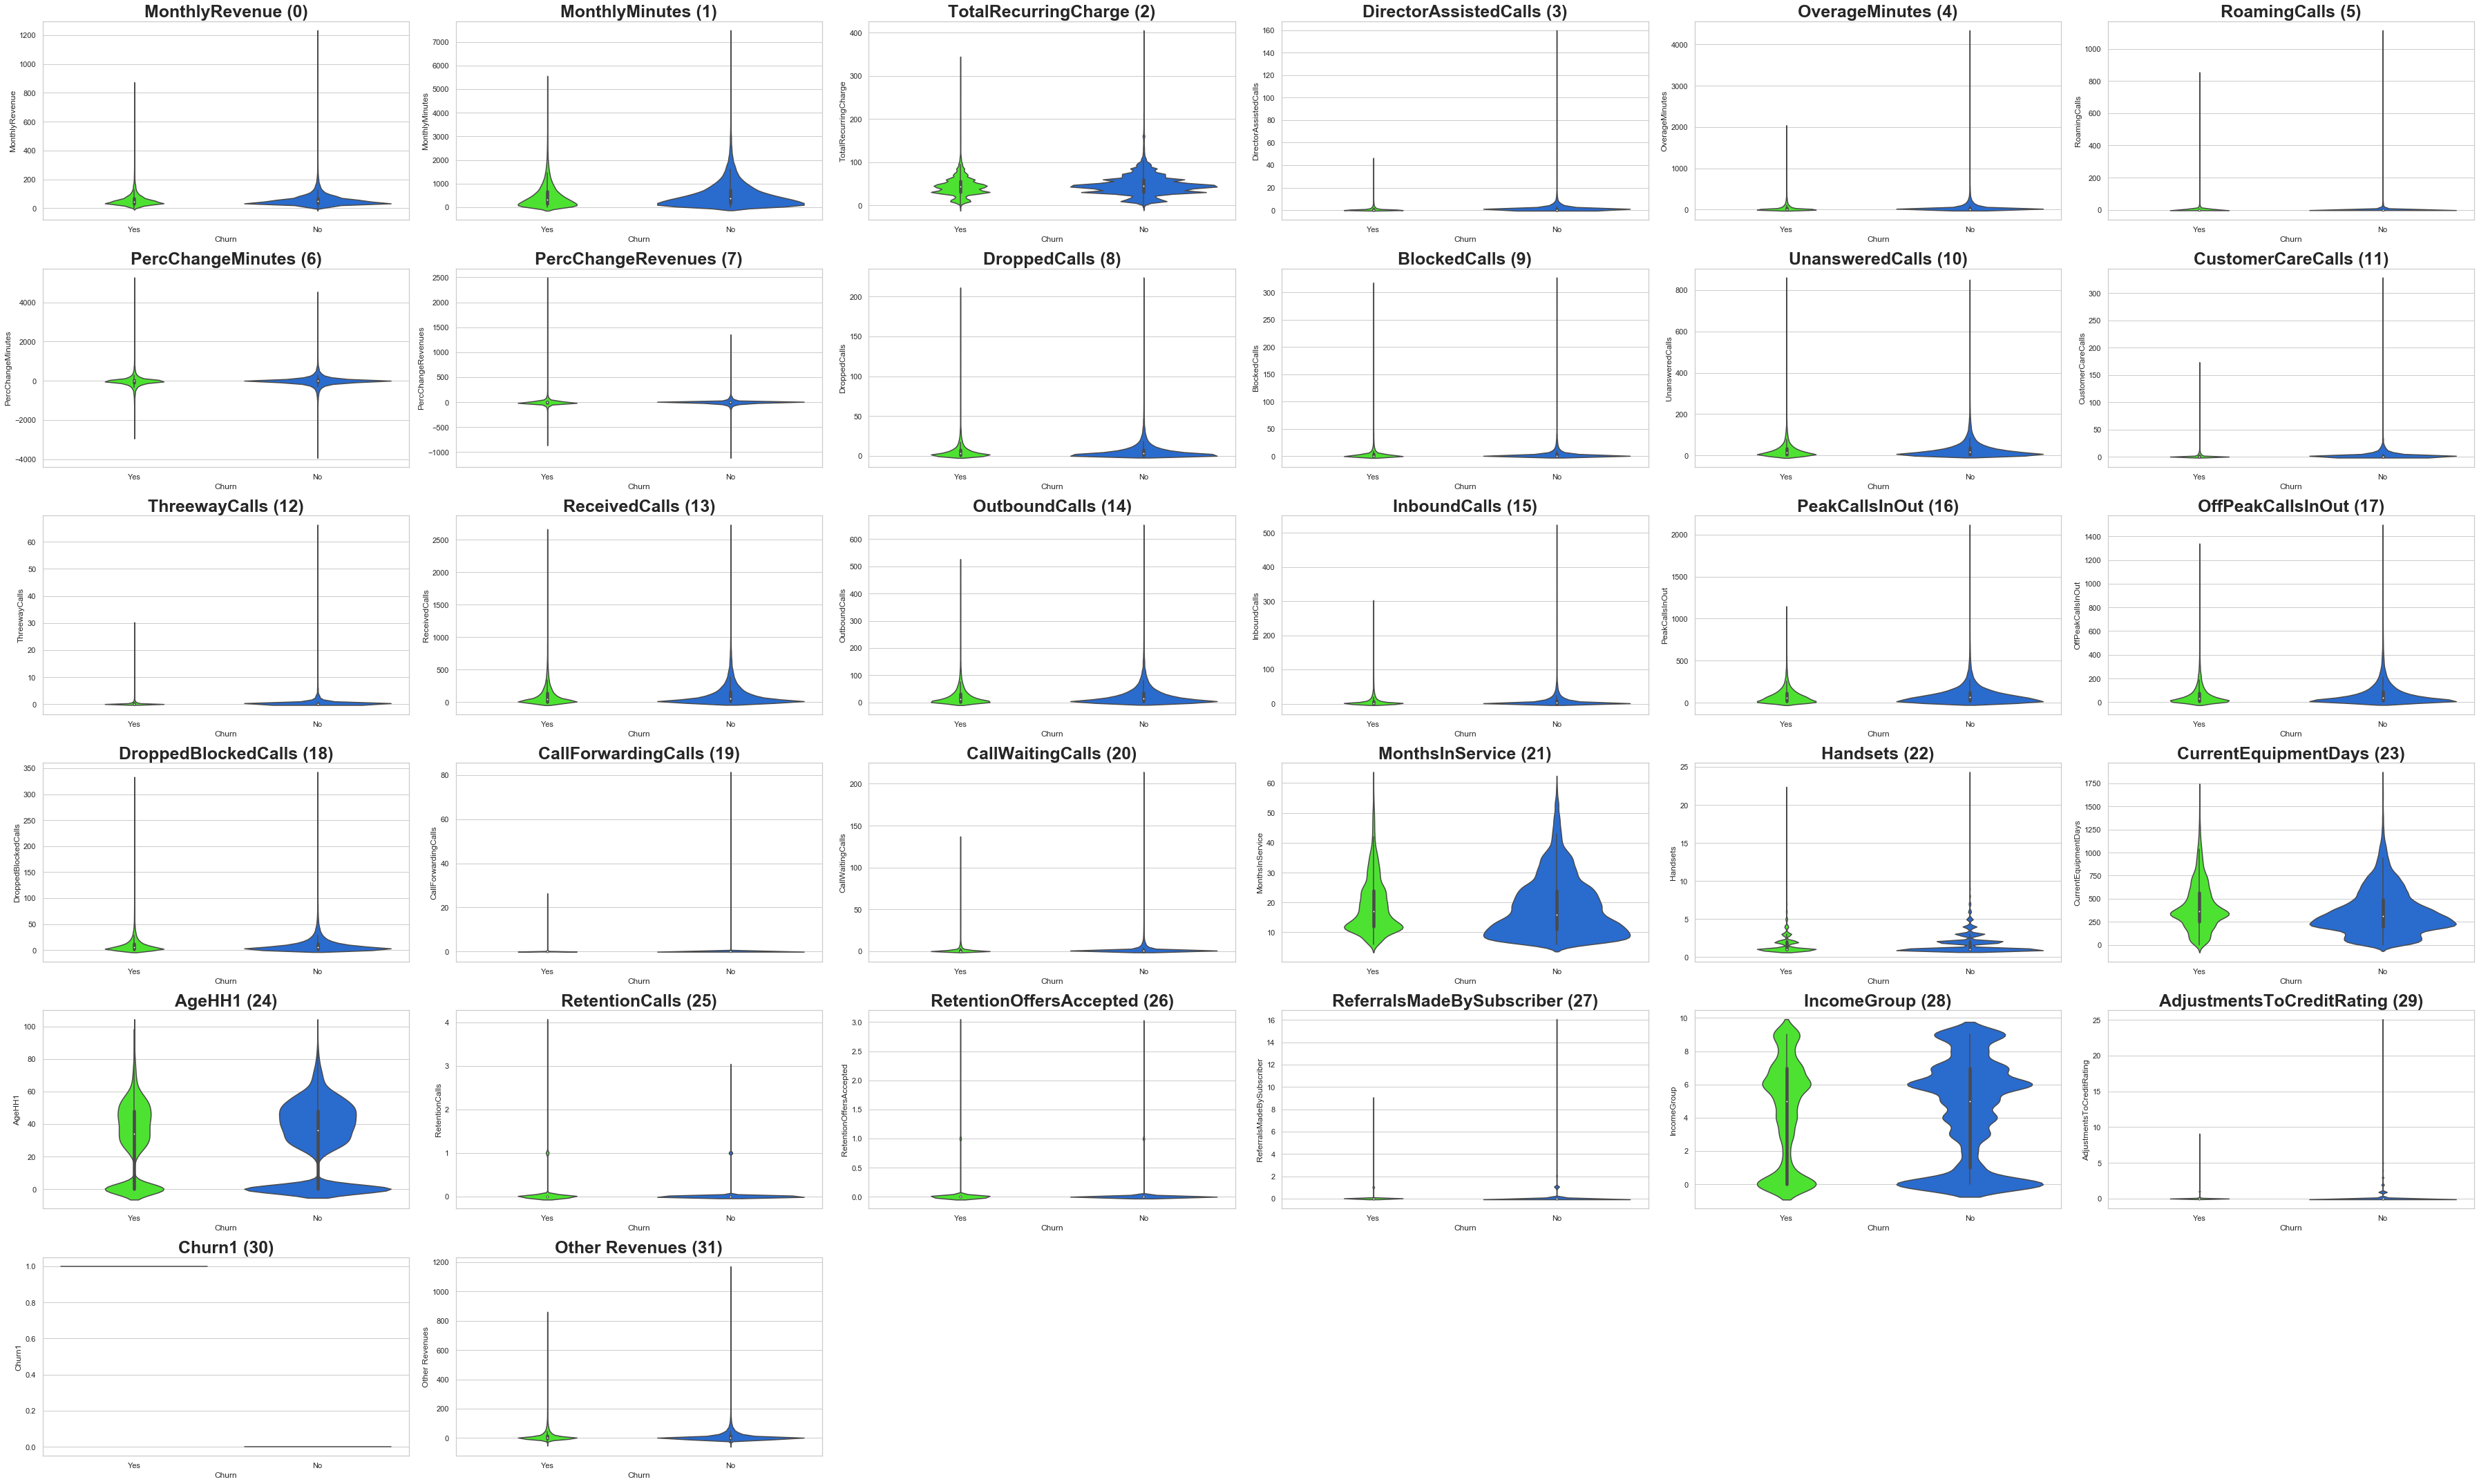

In [13]:
#Plotting Violin Plots of original Numerical Data   
plot_num = 1
fig = plt.figure(figsize = (50, 30))
for i in range(32):
    plt.subplot(6,6, plot_num)
    sns.violinplot(x = 'Churn', y= num_cols[i], data = df, palette = {'Yes':'#39ff14', 'No' : '#0f66e9'} ,scale = 'count')
    plt.title(num_cols[i] + ' (' + str(plot_num - 1) + ')', fontsize = 25, fontweight = 'bold')
    plt.tight_layout()
    plot_num = plot_num + 1

fig.savefig('fullviolin.png')

- Customers are more likely to churn in the earlier stages of the months in service cycle. 
- Customers that have equipment go longer without updating their equipment/mobile device tend to churn higher than those that update their equipment sooner.
- The wide distribution in both high and low income brackets indicates that there is no meaningful correlation to churn. 

##### In an effort to improve visual distribution of the data, the following numerical features will be looked at categorically through an issued set of parameters.


- ##### Referrals
- ##### Retention Offers
- ##### Dropped Calls
- ##### Call Volumn
- ##### Overage
- ##### Tenure
- ##### Income Groups
- ##### Age

### Categorical Variables

In [19]:
bin_hilow = ['low','moderate','high']
# def bin_3(column):
#     pd.qcut(df["'"+ column + "'"],q= 3, labels = bin_hilow)

#Numerical > Categorical for Visualizations
expand_df= df.copy()
# Some numerical values are using Qcut for evenly distributed bins allows churn rate to be compared fairly accross each distribution.
expand_df['Dropped_cat'] =  pd.qcut(df['DroppedCalls'],q= 3, labels = bin_hilow)
#Monthly Charge had smaller distinctions in price and is difficult to depict in histogram.
expand_df['Monthly_Charge_cat'] =  pd.qcut(df['TotalRecurringCharge'],q = 4, labels = ['low', 'moderate', 'high', 'very high'])

#qcut did not work for monthcarecalls due to the not unique values and cutoff
expand_df['CareCalls_cat'] = pd.cut(df['CustomerCareCalls'], 3, labels = bin_hilow)
#Qcut for visualization purposes and excessive bins on histogram due to wide variance of values
expand_df['OffpeakCalls_cat']= pd.qcut(df['OffPeakCallsInOut'],q = 3, labels = bin_hilow)
#Divide by Service Months to equalize metric to subscribers?

#Retentioncalls was made into yes and not due to small amounts
ret_bins = [0, 100]
ret_names = ['No', 'Yes']

# Including Retention into newly added category columns
expand_df['RetentionCalls_cat'] = pd.cut(df['RetentionCalls'],2, ret_bins, labels=ret_names)
catexpand_cols = expand_df.filter(like="_cat").columns

#Adding inboundcalls and outboundcalls to determing usage volume.
TotalCalls = df['InboundCalls']+ df['OutboundCalls']
expand_df['TotalCalls_cat'] = pd.qcut(TotalCalls, q = 4, labels = ['low', 'moderate', 'high', 'very_high'])

#seperating newly made Num > Cat columns use as needed
catexpand_cols = expand_df.filter(like="_cat")
catexpand_cols.columns

#filter for the top four regions
top_4 = expand_df.loc[:, 'Region']
top_4 = top_4[((top_4 == 'South Atlantic')|(top_4 =='Pacific') |(top_4=='Middle Atlantic') |(top_4=='West South Central'))]
top_4


0                   Pacific
1                   Pacific
2                   Pacific
3                   Pacific
4                   Pacific
                ...        
51014    West South Central
51015    West South Central
51016    West South Central
51017    West South Central
51018    West South Central
Name: Region, Length: 33711, dtype: object

In [20]:
#Batching Tenure to better understand time periods after signup at which customers are most likely to churn
def tenure_groups(expand_df):
    if expand_df.MonthsInService <= 12:
        return "less_than_1"
    elif (expand_df.MonthsInService > 12) & (expand_df.MonthsInService <= 24):
        return "less_than_2"
    elif (expand_df.MonthsInService > 24) & (expand_df.MonthsInService <= 36):
        return "less_than_3"
    elif (expand_df.MonthsInService > 36) & (expand_df.MonthsInService<= 48):
        return "less_than_4"
    elif (expand_df.MonthsInService > 48) & (expand_df.MonthsInService <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"

##### Grouping Tenure allows us to get a keen sense of the periods at which users are churning.

In [21]:
#tenure is added to the newly expanded dataframe.
expand_df['Tenure_cat'] = df.apply(lambda df: tenure_groups(df), axis = 1)
expand_df.head(2)

,CustomerID,State,Region,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,Churn,Churn1,Other Revenues,Dropped_cat,Monthly_Charge_cat,CareCalls_cat,OffpeakCalls_cat,RetentionCalls_cat,TotalCalls_cat,Tenure_cat
0,3000002,Oregon,Pacific,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,...,Yes,1,2.00,low,low,low,moderate,No,low,greater_than_5
1,3000982,Oregon,Pacific,53.69,144.0,50.0,0.00,0.0,0.0,72.0,...,No,0,3.69,low,high,low,moderate,No,moderate,less_than_5


In [22]:
# Bundled Category Variables
cat_var = ['Region', 'HandsetPrice', 'PrizmCode', 'Occupation', 'CreditRating_split','AgeGroupHH1','UniqueSubs','ActiveSubs','HandsetModels','Tenure_cat']
#existing categories adds newly made categories
cat_var.extend(catexpand_cols)

#allchurn and numerical and object churn, but is filtered with yes and no
# All_churn is filtered for Churn-yes and all_nchurn is fileter for no
all_churn = expand_df.loc[expand_df['Churn1'] == 1]
all_nchurn = expand_df.loc[expand_df['Churn1'] == 0]

##### Binary Variables


In [23]:
#Using expanded dataframe that includes new categorical and original columns
bin_var = expand_df.copy()

#dropping to narrow down to only binary variables
bin_var = bin_var.drop(cat_var, axis =1)
bin_var = bin_var.drop(num_cols, axis = 1)
bin_var = bin_var.drop(['State','CustomerID'], axis = 1)


#Numerical referral > binary
ref_bins = [0 , 1000]
#As can be seen from the histogram above, Refferals was not accurately depicted new to the small range of values.
ref_names = ['Yes','No']
expand_df['Referrals_bin'] = pd.cut(df['ReferralsMadeBySubscriber'],2, ref_bins, labels=ret_names)
bin_var['Referrals_bin'] = expand_df['Referrals_bin']


#bin_cols consists of only binary columns to filter as needed
bin_cols = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'MaritalStatus','Referrals_bin', 'Churn', ]

#Reordering bin_var
bin_var= bin_var[bin_cols]

NameError: name 'bin_var' is not defined

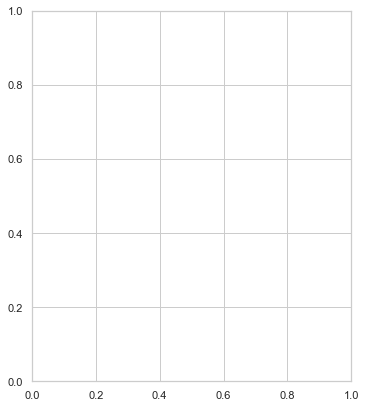

In [9]:
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(bin_var.HandsetWebCapable.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.onlinebackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.deviceprotection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.techsupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.streamingtv.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)

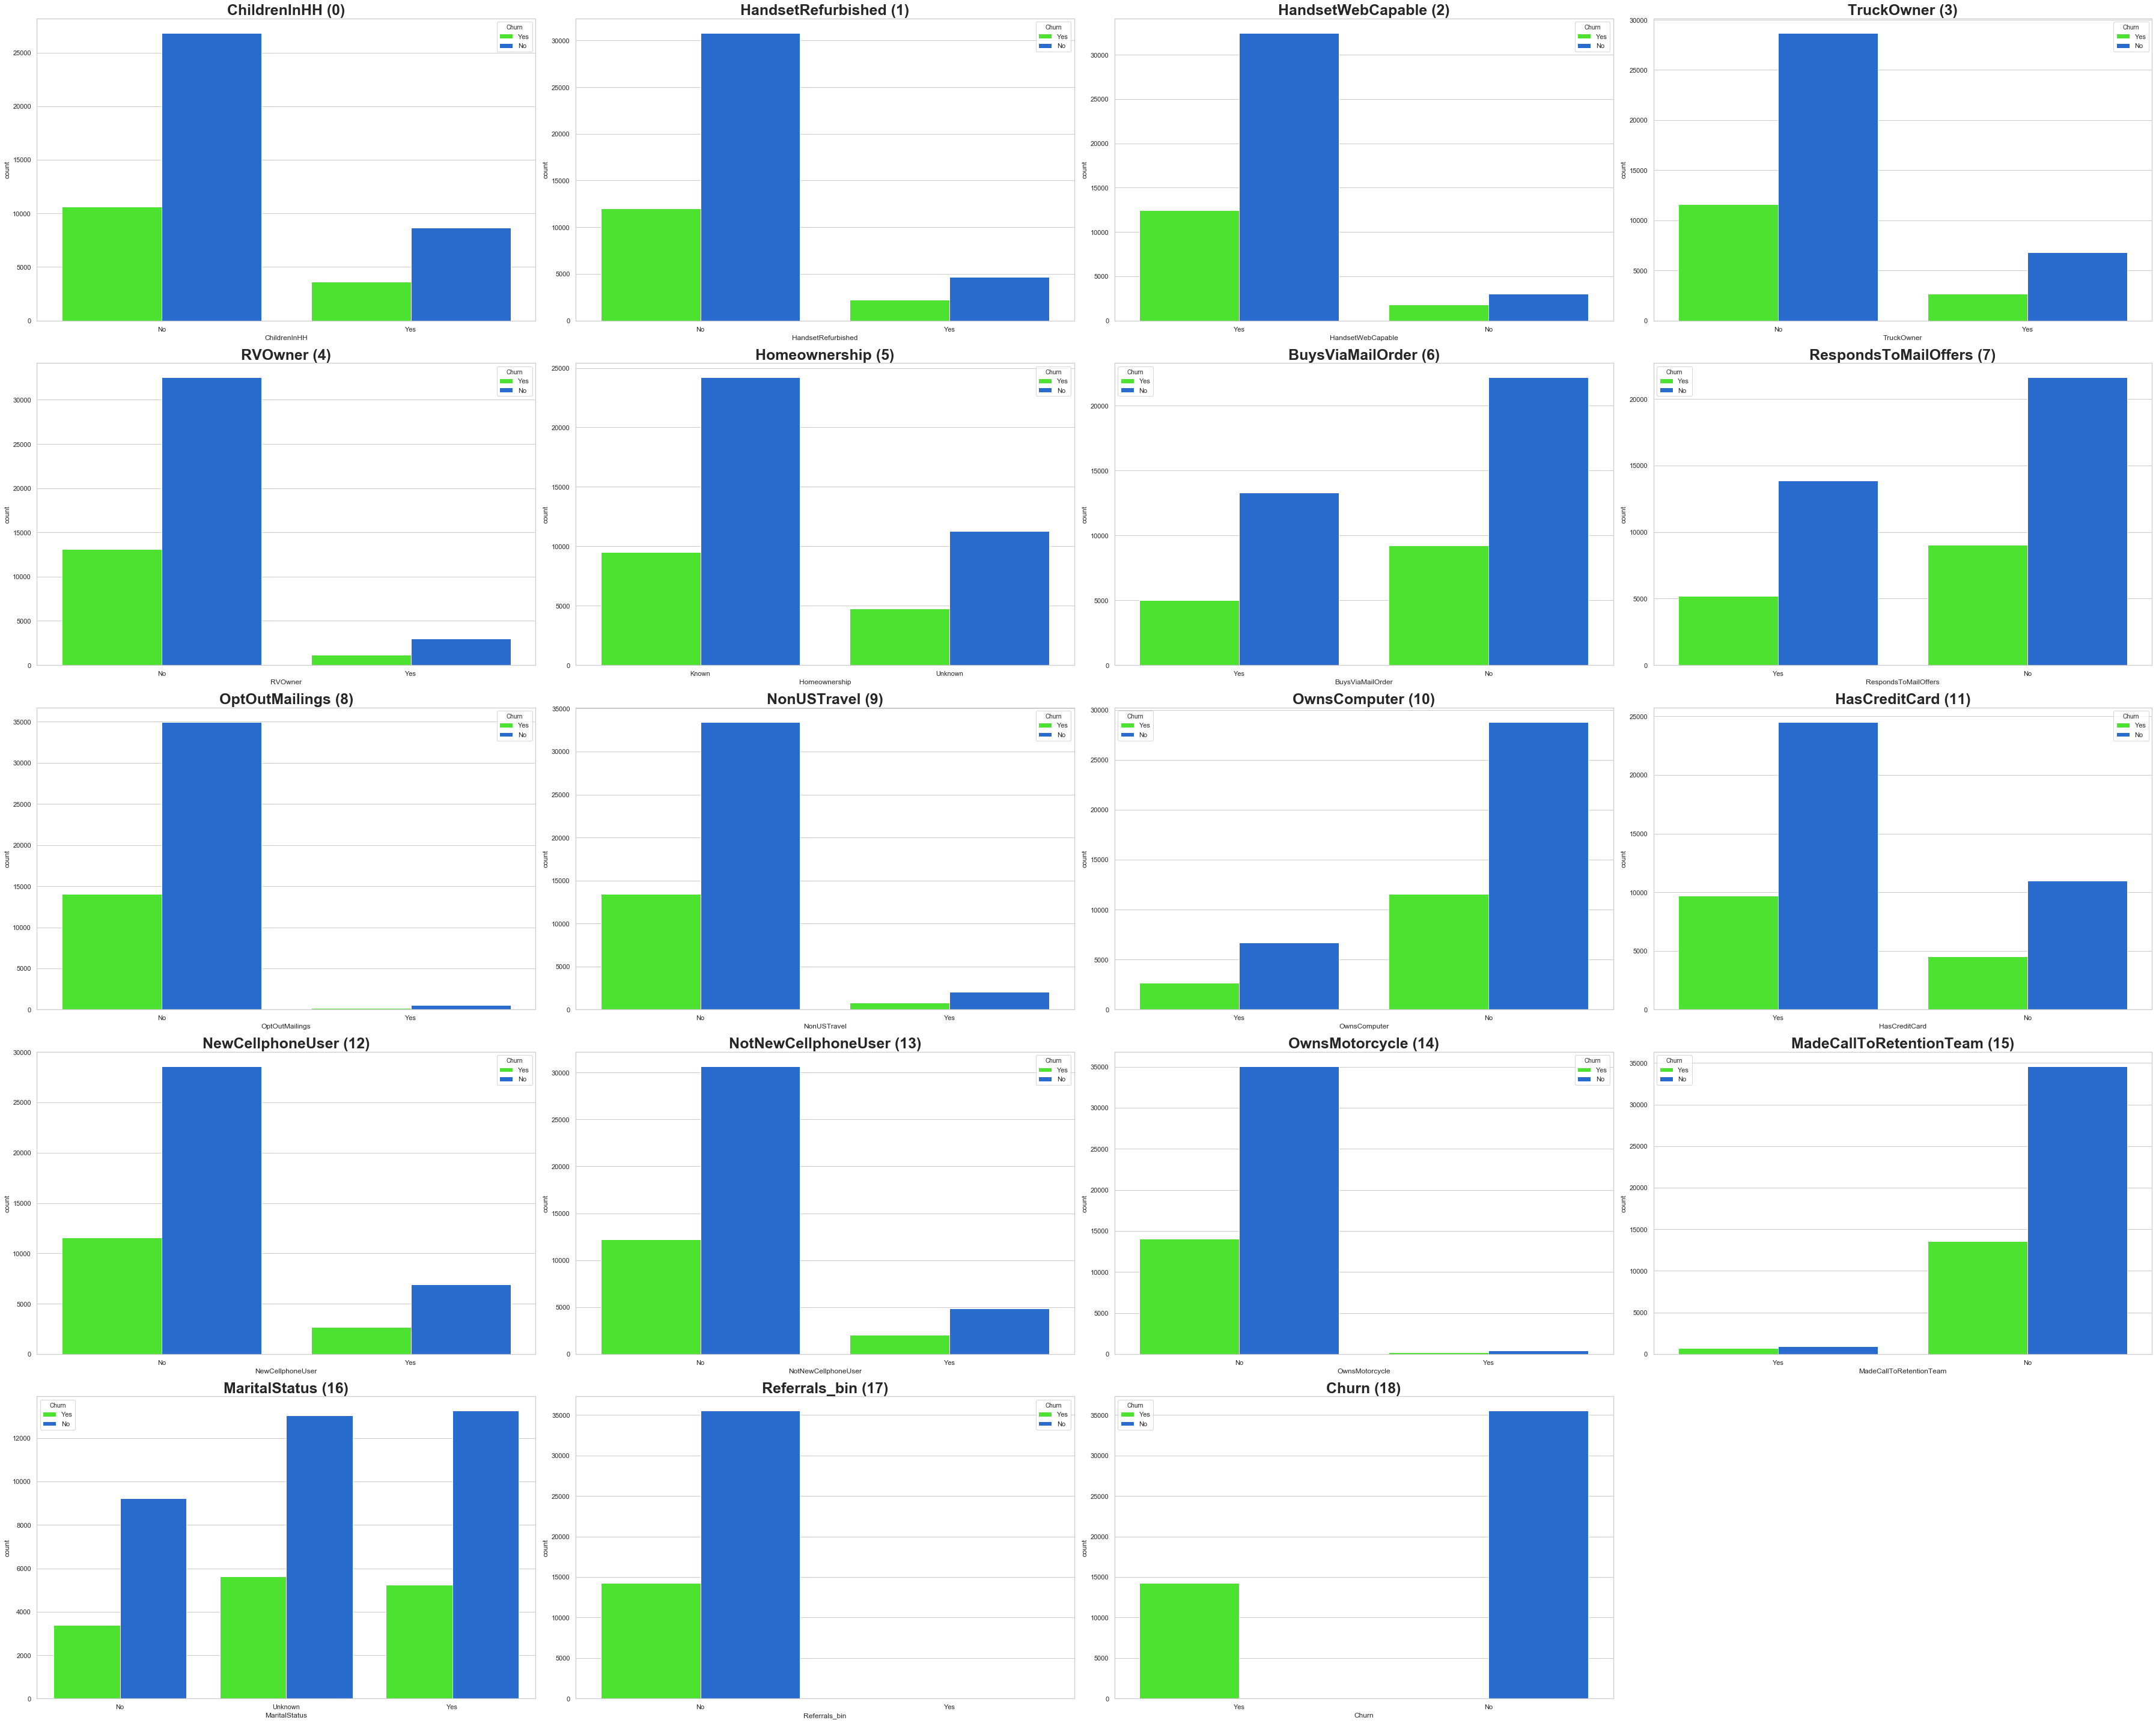

In [24]:
#Plotting  all binary variables
plot_num= 1
fig = plt.figure(figsize = (50, 40))

for i in range(19):
    plt.subplot(5,4,plot_num)
    sns.countplot(x=bin_var.iloc[:,i], hue=bin_var["Churn"],palette = {'Yes':'#39ff14', 'No' : '#0f66e9'})
    plt.title(bin_cols[i] + ' (' + str(plot_num - 1) + ')', fontsize = 25, fontweight = 'bold')
    plt.tight_layout()
    plot_num = plot_num + 1
    
fig.savefig('all_bin_counts.png')

- Customers that have webservice are less likely to stop services than those that dont have web services. 
- Refurbished handset owners have a higher churn rate than those that have bought new devices.
- If a user makes a call to the retention team it is likely the user had an intent prior to the call to end service and is not a meaningful prediction metric. 
- Referrals do not happen enough to be measured, and may want to be considered in future initiatives. 

In [21]:
bin_cols

['ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MaritalStatus',
 'Referrals_bin',
 'Churn']

### Other numerical values that were categorized accordingly in an effort to improve the visualizatons.
- Adding Inbound Calls and Outbound Calls together and diving into 3 categories to guage usage (Light, Medium, Heavy)
- Specifying Bin Number for Customer Care Calls (183 diff values) Broken into 5 Bins
- Dropped Calls Broken into Frequency Bins (NotOften, Seldom, Often)
- OverageMinutes/Service Months - (NotOften, Seldom, Often)
###### As commented previously, a quantile cut is being used for seperating data by attribute to better equalize the attributes which then allows churn and nonchurn data to have an equitable comparison.

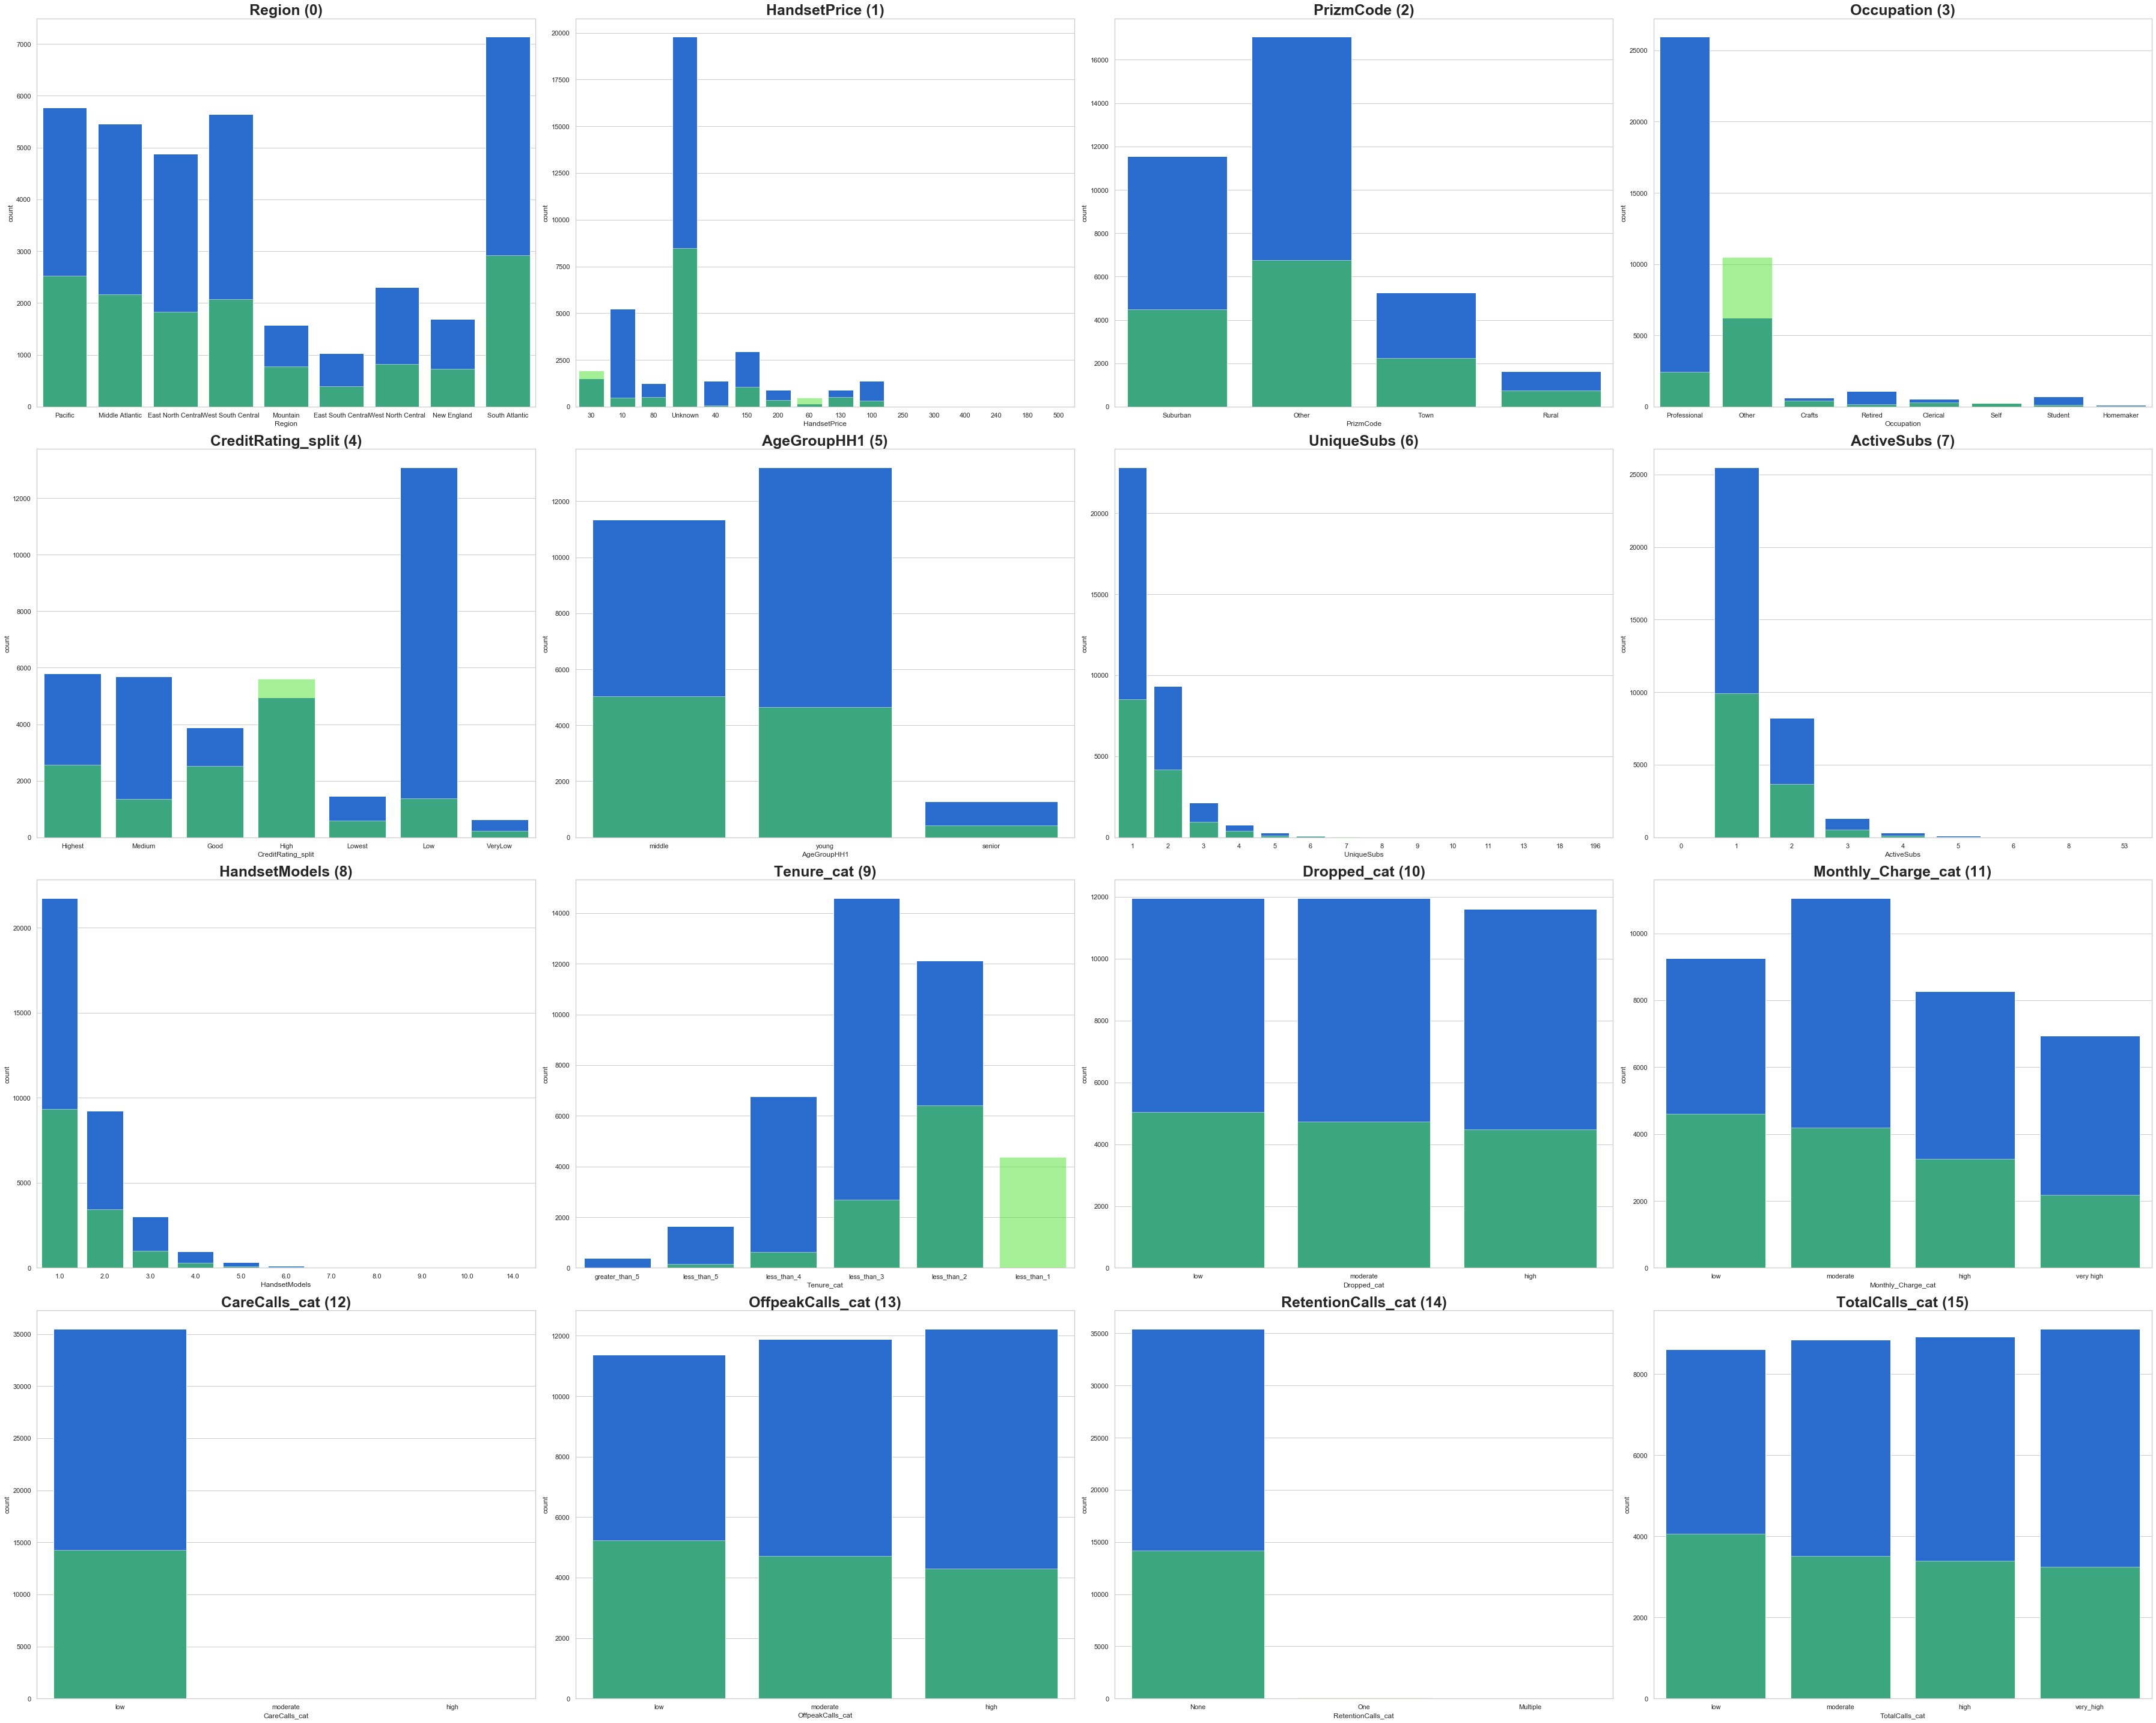

In [112]:

#count plots appear as stacked barcwere made with categorical variables to see a visual representation of churn
hist_ax= 1
fig = plt.figure(figsize = (50, 40))
for i in range(16):
    plt.subplot(4,4, hist_ax)
    sns.countplot(x = cat_var[i], data =all_nchurn, color = '#0f66e9')
    sns.countplot(x = cat_var[i], data = all_churn, color = '#39ff14', alpha = .5 )
    plt.title(cat_var[i] + ' (' + str(hist_ax - 1) + ')', fontsize = 25, fontweight = 'bold')
    plt.tight_layout()
    hist_ax = hist_ax + 1


fig.savefig('cat_var.png')

- The charts where Churn(green) surpasses NonChurn(blue) are attributes that have abnormal high levels of Churn that are greater than 50%.
- Handset Price shows high churn in a low and high tier price and therefore may not have meaningful correlation to churn.
- Customers that classify their occupation as professional show significantly higher churn than other occupations. 
- A high credit rating is abnormally exceedingly higher in churn than not only other categories but also higher in churn than non-churn with a high credit rating. Furthermore, customers with a good rating is also higher in proportion than to other credit rating categories. 
- Customers with a monthly charge that is lower in scale to other customers are most likely to 
- If to stop services it will most like be decided within the first two years. 
- A higher churn rate for users that had a low volume of total inbound and outbound calls may be a result of customers looking for a phone plan more suitable to their low usage. 
- A customer that buy a 30 dollar phone is highly likely to end service early. 

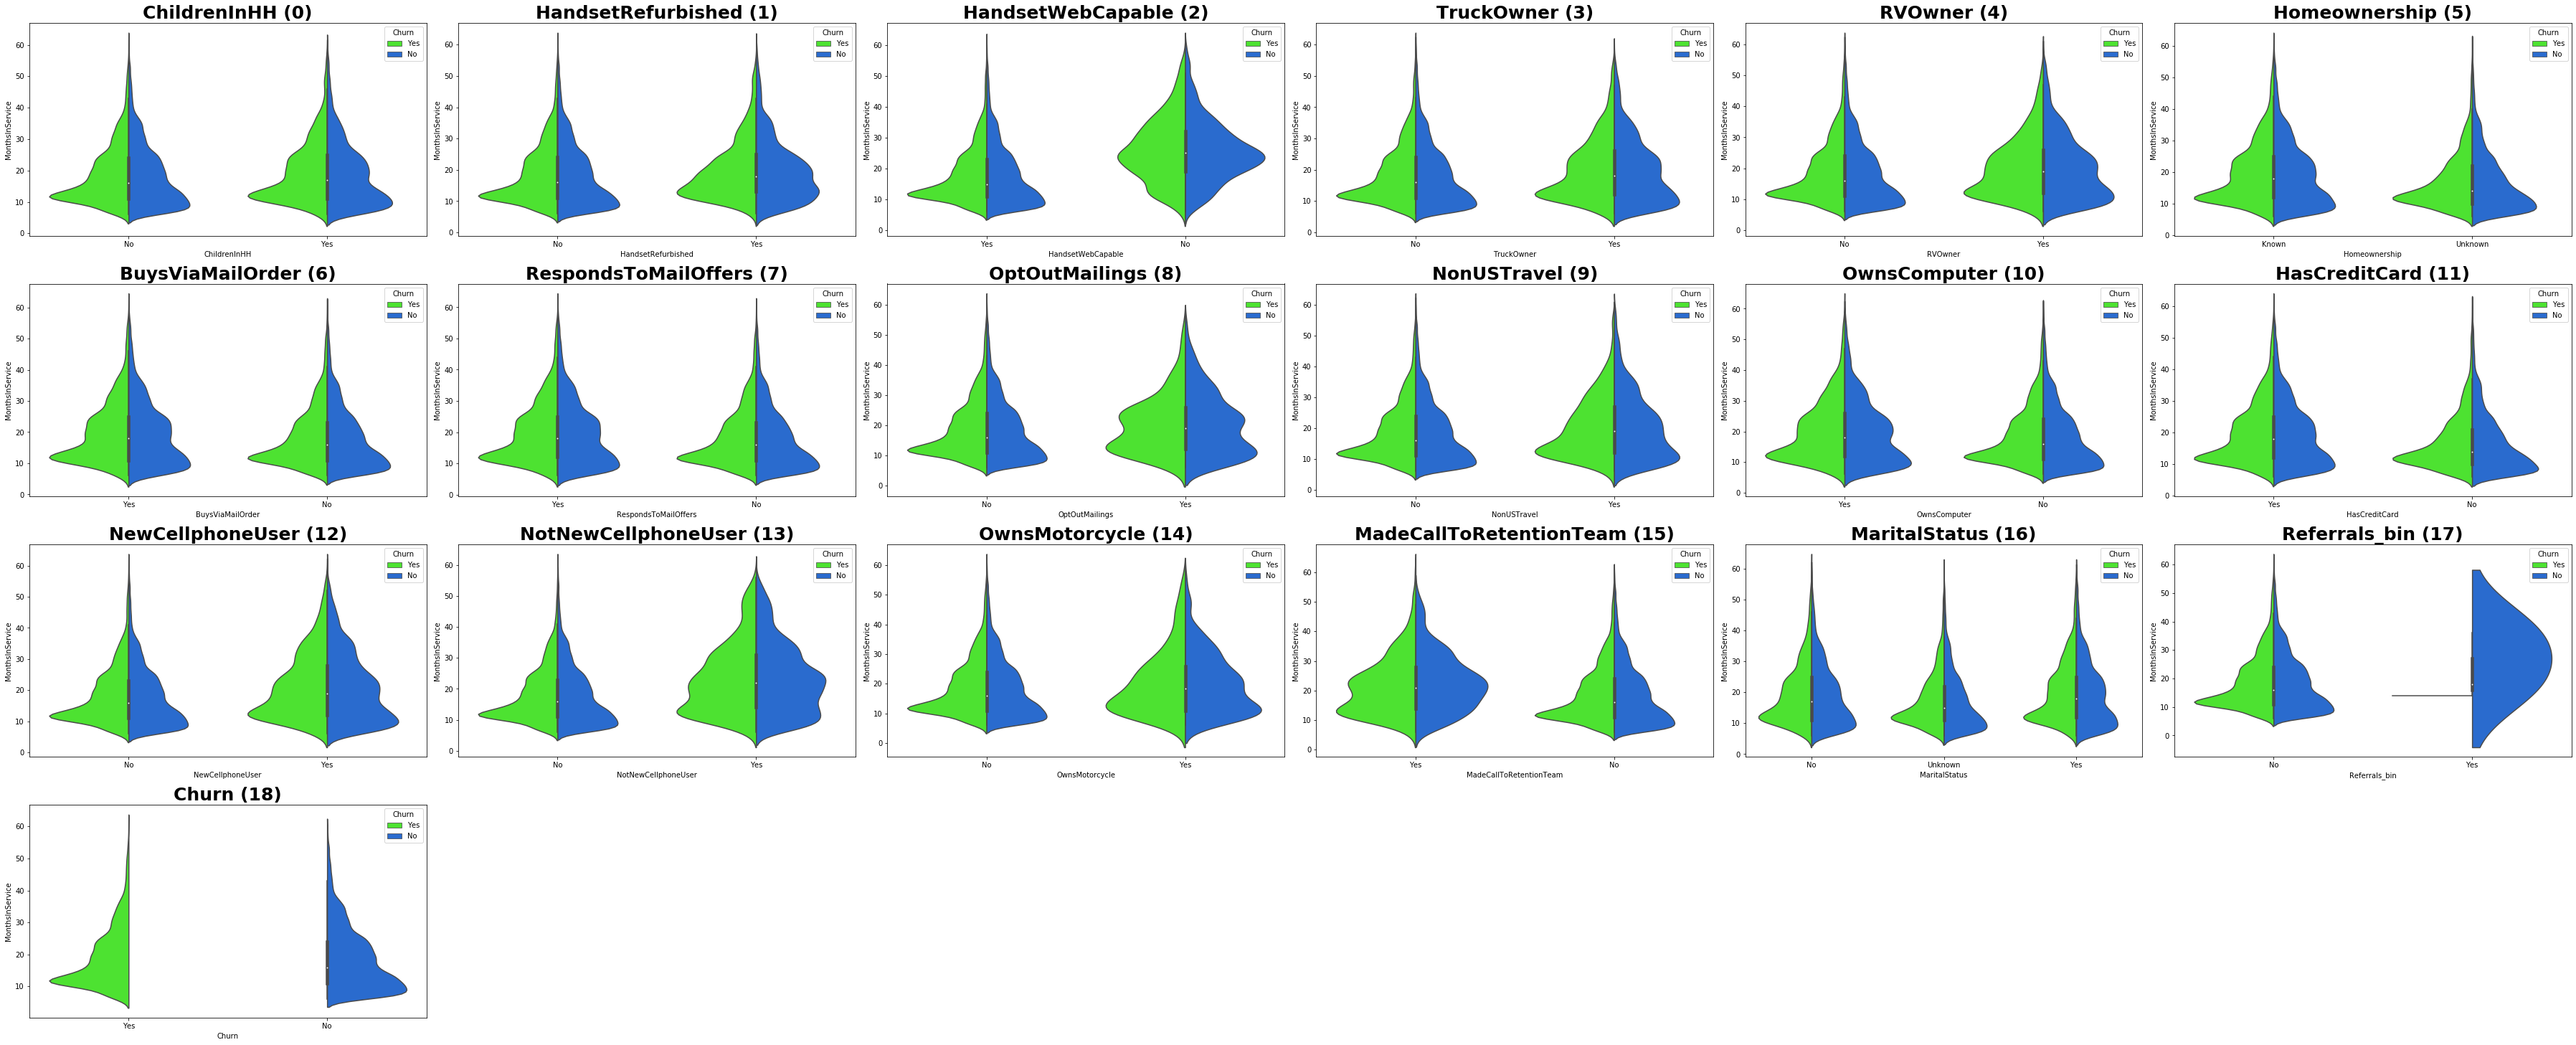

In [22]:
### Comparing Tenure(MonthsInService) and Current Equipment with categorical variables With Violin Plots


plot_num= 1
fig = plt.figure(figsize = (50, 30))
for i in range(19):
    plt.subplot(6,6,plot_num)
    sns.violinplot(bin_cols[i], 'MonthsInService', 'Churn', expand_df, palette = {'Yes':'#39ff14', 'No' : '#0f66e9'}, split= True)
    plt.title(bin_cols[i] + ' (' + str(plot_num - 1) + ')', fontsize = 25, fontweight = 'bold')
    plt.tight_layout()
    plot_num = plot_num + 1
fig.savefig('tenure_vsplits.png')

#### By having a closer look at Tenure, and more specifically the earlier periods of Tenure,  we will in turn be able to note other variables that may have underlying correlation.
###### Variables that are visually shown to correlate with Churn include:
- We can see that those that dont have web services are more likely to Churn in later months and that the customers that of the customers that do have web services, they are more likely to cancel more earlier on. This can later prove to be an indication that web service needs are not being satisfied. 
- Customers that opt out of mailings are show that the churn rate goes up in between two and three years of services.
- Users that made calls to the retention team have are prone to churn more in unison to the inveral at which Churn Rate is at its highest overall (1 to 1.5 years). However, this correlation could be a result of collinearity.
- Users that refer other users, essentially do not churn at all however, the data that exists is a very small sample. This leave management an opportunity to explore the possiblity of working to improve users' willingness to make future referrals.


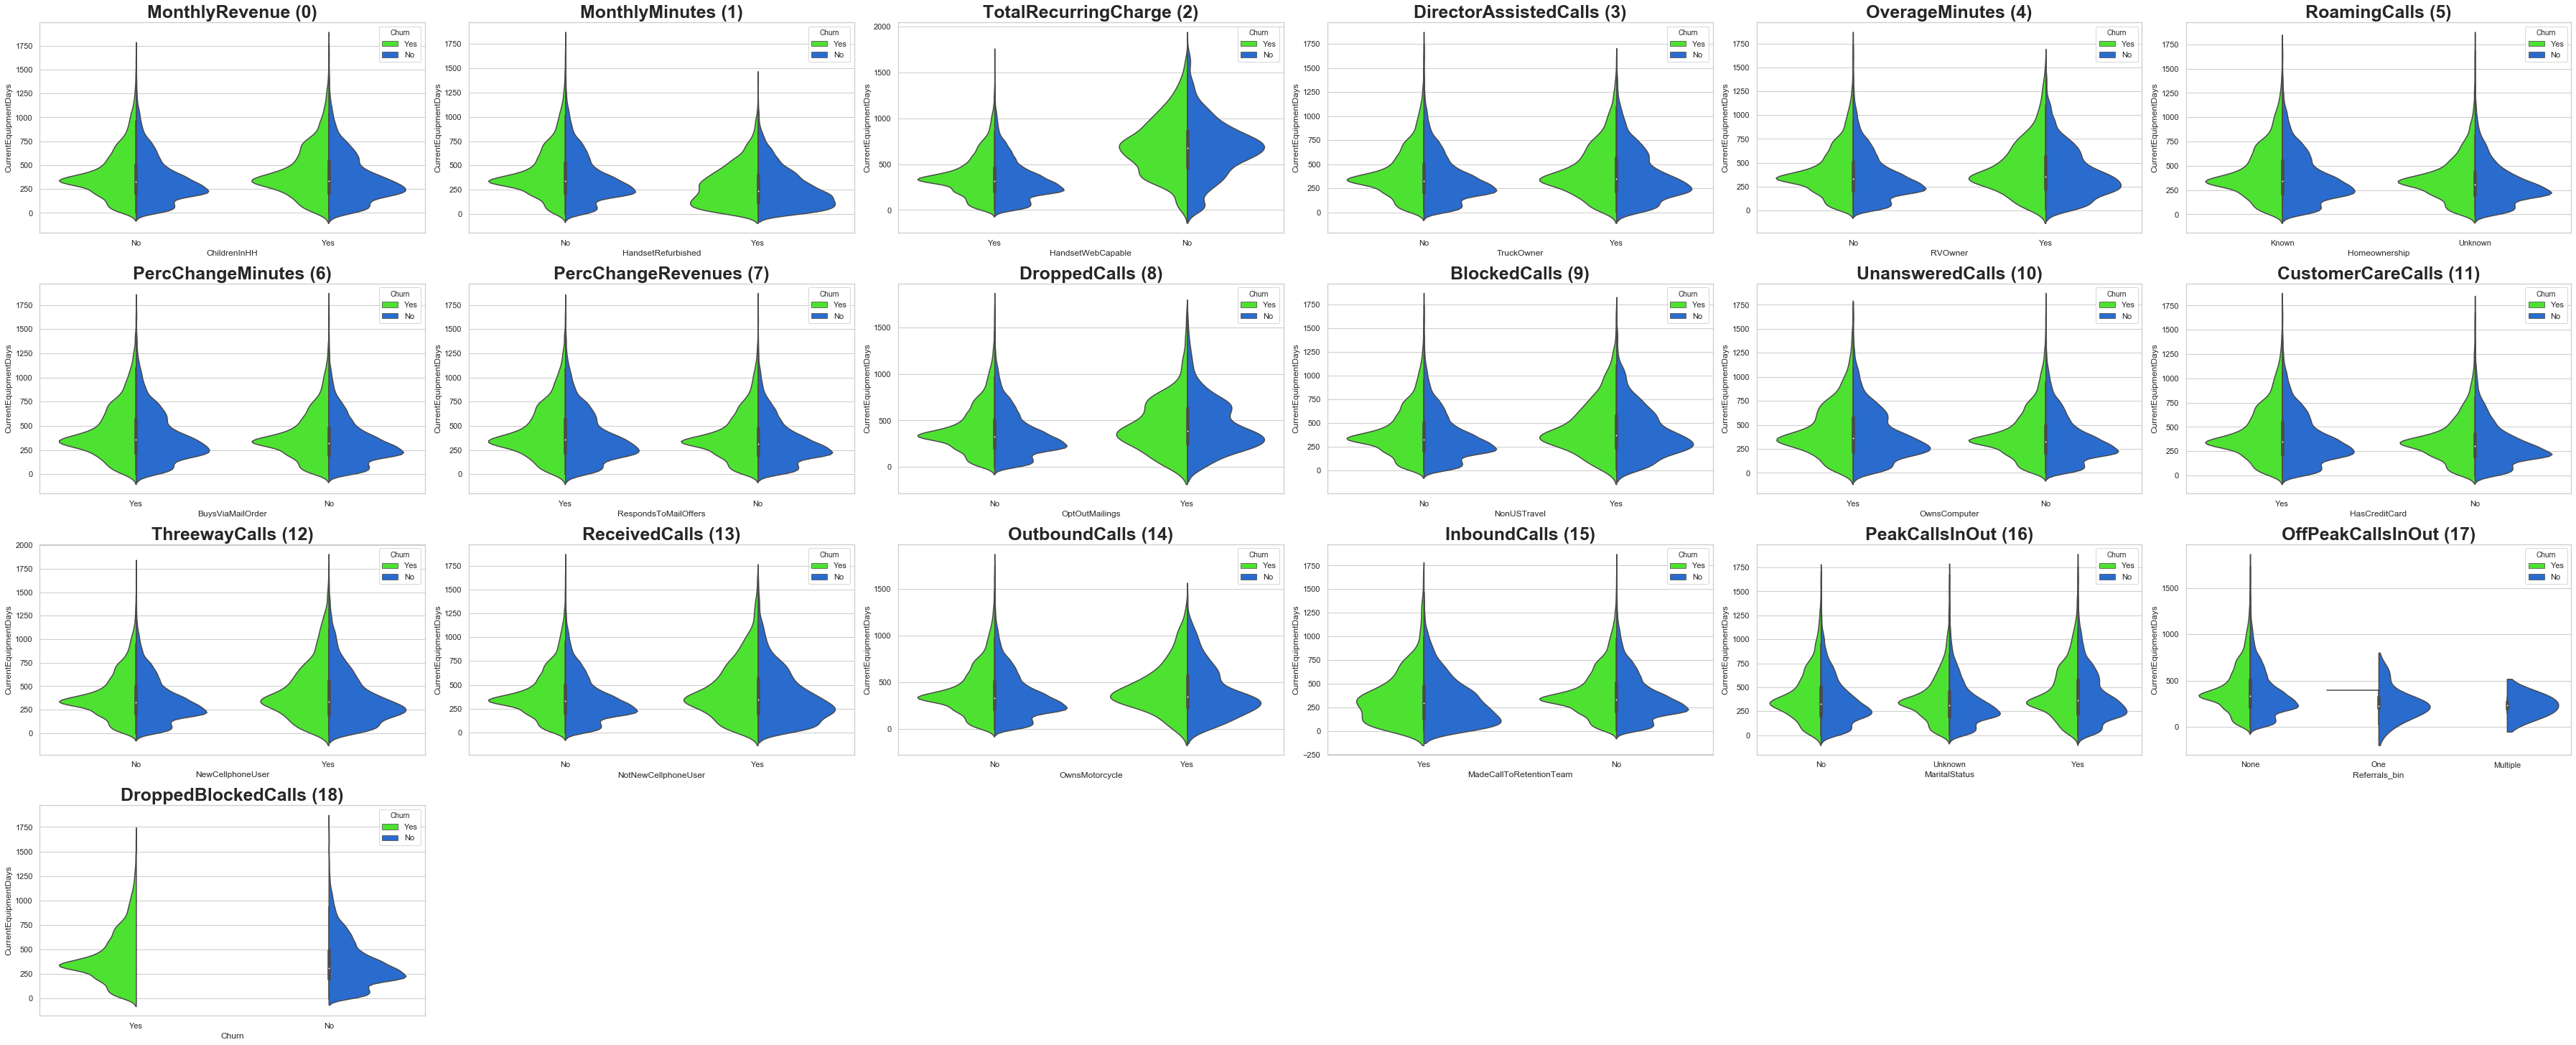

In [149]:
plot_num= 1
fig = plt.figure(figsize = (50, 30))
for i in range(19):
    plt.subplot(6,6,plot_num)
    sns.violinplot(bin_cols[i], 'CurrentEquipmentDays', 'Churn', expand_df, palette = {'Yes':'#39ff14', 'No' : '#0f66e9'}, split= True)
    plt.title(num_cols[i] + ' (' + str(plot_num - 1) + ')', fontsize = 25, fontweight = 'bold')
    plt.tight_layout()
    plot_num = plot_num + 1

In [30]:
#Revised Expand DF to be used in Models includes All numerical and original data and therefore includes redundancy

expand_df.head()
expand_df.columns
reorder = ['CustomerID', 'State', 'Region', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService','Tenure_cat',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
       'PrizmCode', 'Occupation', 'MaritalStatus', 'CreditRating_split',
       'AgeGroupHH1', 'Dropped_cat', 'Monthly_Charge_cat',
       'CareCalls_cat', 'OffpeakCalls_cat', 'TotalCalls_cat', 'Referrals_bin',
       'RetentionCalls_cat','Churn', 'Churn1']

#df2 has both old and new grouped columns
df2 = expand_df[reorder]
df2.to_csv('full_df.csv')

NameError: name 'df2' is not defined

##### Saving file for prepped dataframes for regression notebook Includes old and new and will need to be seperated when working with in regression:
- CustomerID
- State
- Region
- MonthlyRevenue
- MonthlyMinutes
- TotalRecurringCharge
- DirectorAssistedCalls
- OverageMinutes
- RoamingCalls
- PercChangeMinutes
- PercChangeRevenues
- DroppedCalls
- BlockedCalls
- UnansweredCalls
- CustomerCareCalls
- ThreewayCalls
- ReceivedCalls
- OutboundCalls
- InboundCalls
- PeakCallsInOut
- OffPeakCallsInOut
- DroppedBlockedCalls
- CallForwardingCalls
- CallWaitingCalls
- MonthsInService
- UniqueSubs
- ActiveSubs
- Handsets
- HandsetModels
- CurrentEquipmentDays
- AgeHH1
- ChildrenInHH
- HandsetRefurbished
- HandsetWebCapable
- TruckOwner
- RVOwner
- Homeownership
- BuysViaMailOrder
- RespondsToMailOffers
- OptOutMailings
- NonUSTravel
- OwnsComputer
- HasCreditCard
- RetentionCalls
- RetentionOffersAccepted
- NewCellphoneUser
- NotNewCellphoneUser
- ReferralsMadeBySubscriber
- IncomeGroup
- OwnsMotorcycle
- AdjustmentsToCreditRating
- HandsetPrice
- MadeCallToRetentionTeam
- PrizmCode
- Occupation
- MaritalStatus
- CreditRating_split
- AgeGroupHH1
- Dropped_cat
- Monthly_Charge_cat
- CareCalls_cat
- OffpeakCalls_cat
- TotalCalls_cat
- Referrals_bin
- RetentionCalls_cat
- Churn
- Churn1

In [205]:
#Making a tableau dataframe that includes all original dataframe, and more specifically- geographic data.
df3 = df.copy()
df3 = df.drop(to_drop, axis = 1)
df3.head()
df3.to_csv('tableau_df.csv')